<a href="https://colab.research.google.com/github/UNB-TME-6017-W24/assignment-1-ShriHemaPriya/blob/main/ShriHemaPriyaGanesan_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Describe in Function**




**tf.keras.layers.Conv2D:**

It’s a 2D convolutional layer which is used for image classification and object detection. This was inherited from layer or module. This layer produces a tensor of outputs by creating a convolutional layer in the input layer. It has so many attributes like input_shape, activation, dilation_rate and etc.

**Code Snippet:**
tf.keras.layers.Conv2D(2,3,activation='relu',dilation_rate=2,input_shape=input_shape[1:])

**Explanation:**
The above Conv2D layer consists of 2 filters, 3*3 kernel size, relu as activation function, dilation rate of 2 which represents one empty pixel between the kernel elements, input shape of 1 which excludes the first dimension.


**tf.keras.layers.MaxPooling2D:**
The MaxPooling2D layer is used for handling 2D spatial data. It reduces the spatial dimensions with input by using the maximum value from a group of neighboring pixels.

**Code Snippet:**
tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')

**Explanation:**
* pool_size(2,2) – Size of the pooling window. MaxPooling takes the maximum value in each 2*2 window.
* strides(2,2) – The pooling window moves with a stride of 2 in both horizontally and vertically which reduces the spatial dimensions by 2.
* padding=’valid’ – No padding is applied which indicates the complete pooling windows within the input are considered.






**tf.keras.layers.Dropout:**
This layer is used to prevent overfitting issue by setting the input units to 0at each step in the training phase. When the training attribute is set to true in model.fit() function, then the dropout layer applies and it will not be applicable if the training attribute is set to false.

**Code Snippet:**
tf.keras.layers.Dropout(rate=0.2, input_shape=(2,))

**Explanation:**
* rate=0.2 – The range lies only between 0 and 1. It indicates the fraction of input to be dropped out.
* input_shape=(2,) – It indicated that the expected input has a shape of 1D array with 2 elements.




**tf.keras.layers.Flatten:**
keras.layers.Flatten() - This layer just flattens the input and it will affect the batch size.


**tf.keras.layers.Dense:**
It is a densely connected layer with each neuron. It has many attributes like units, activation, kernel_initializer and etc like the below code snippet.

tf.keras.layers.Dense(128,activation=’relu’)


**2. Setup and Load the MNIST Dataset**


In [1]:
#Import the necessary libraries from TensorFlow and Keras.
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt


In [2]:
#Load the MNIST dataset and split it into training and testing sets.
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#Normalize the pixel values of the images to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0
#Convert the class vectors to binary class matrices (one-hot encoding).
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
#printing the shape of X_train to know about the number of data
print(x_train.shape)


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


**3. Build the CNN Model**

In [3]:
#CNN Architecture
model = Sequential()
# A convolutional layer with 32 filters, a 3x3 kernel size, and the 'relu' activation function.
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# A max-pooling layer with a 2x2 pool size.
model.add(MaxPooling2D(pool_size=(2, 2)))
# A dropout layer with a dropout rate of 0.25.
model.add(Dropout(0.25))
#Another convolutional layer with 64 filters, a 3x3 kernel size, and the 'relu' activation function.
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
#A max-pooling layer with a 2x2 pool size.
model.add(MaxPooling2D(pool_size=(2, 2)))
#A dropout layer with a dropout rate of 0.25.
model.add(Dropout(0.25))
#A flatten layer to convert the 2D output to a 1D vector.
model.add(Flatten())
#A dense layer with 128 units and the 'relu' activation function.
model.add(Dense(128, activation='relu'))
#A dropout layer with a dropout rate of 0.5.
model.add(Dropout(0.5))
#A dense output layer with 10 units and the 'softmax' activation function.
model.add(Dense(10, activation='softmax'))


In [4]:
# Compile the model with an appropriate optimizer, loss function, and metrics.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**4. Train and Test the Model**

In [5]:
#Split validation data for training
x_val = x_train[-10000:]
y_val = y_train[-10000:]
#Train the model
def train_model(model, x_train, y_train, batch_size, epochs):
  #Save and print the history of the trained model.
  global tmodel
  tmodel = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(x_val, y_val))
  print(tmodel.history)
  #Return the model
  return model


In [6]:
#Evaluate the model
def evaluate_model(model, x_test, y_test):
  score = model.evaluate(x_test, y_test, verbose=0)
  #Print the loss and accuracy
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

In [7]:
#Choose an appropriate batch size and number of epochs to train MNIST data.
trainedmodel = train_model(model, x_train, y_train, batch_size=64, epochs=8)

Epoch 1/8
938/938 [==============================] - 61s 63ms/step - loss: 0.2999 - accuracy: 0.9060 - val_loss: 0.0542 - val_accuracy: 0.9853
Epoch 2/8
938/938 [==============================] - 60s 64ms/step - loss: 0.1064 - accuracy: 0.9682 - val_loss: 0.0406 - val_accuracy: 0.9870
Epoch 3/8
938/938 [==============================] - 57s 61ms/step - loss: 0.0824 - accuracy: 0.9755 - val_loss: 0.0313 - val_accuracy: 0.9913
Epoch 4/8
938/938 [==============================] - 57s 61ms/step - loss: 0.0745 - accuracy: 0.9773 - val_loss: 0.0278 - val_accuracy: 0.9927
Epoch 5/8
938/938 [==============================] - 57s 61ms/step - loss: 0.0627 - accuracy: 0.9809 - val_loss: 0.0197 - val_accuracy: 0.9943
Epoch 6/8
938/938 [==============================] - 60s 64ms/step - loss: 0.0556 - accuracy: 0.9833 - val_loss: 0.0177 - val_accuracy: 0.9951
Epoch 7/8
938/938 [==============================] - 56s 60ms/step - loss: 0.0504 - accuracy: 0.9844 - val_loss: 0.0160 - val_accuracy: 0.9958

In [8]:
#Evaluate the model on the MNIST test set and report the accuracy.
score = trainedmodel.evaluate(x_test, y_test, verbose=0)
#Print the loss and accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.021043621003627777
Test accuracy: 0.9930999875068665


**5. Analysis and Reporting**

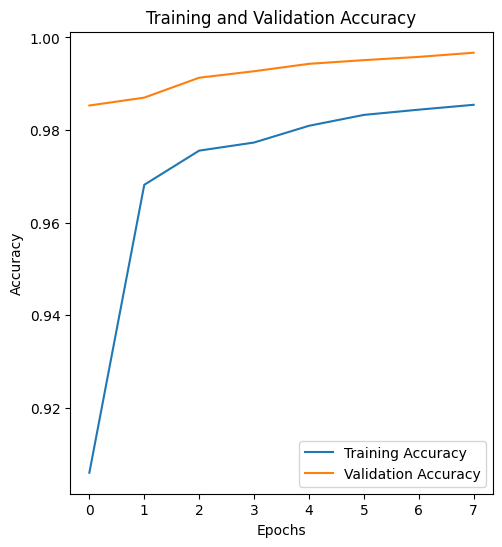

In [9]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(tmodel.history['accuracy'], label='Training Accuracy')
plt.plot(tmodel.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()




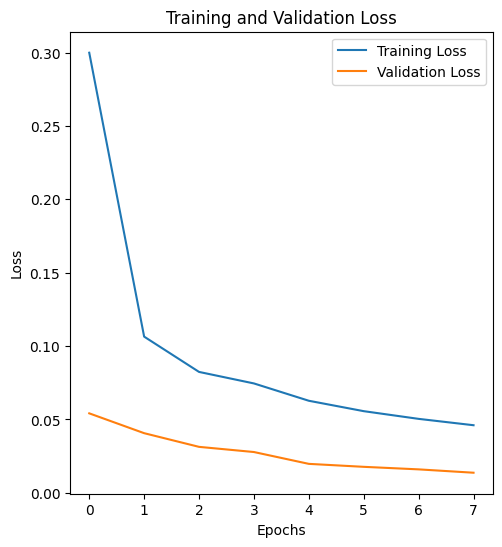

In [10]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(tmodel.history['loss'], label='Training Loss')
plt.plot(tmodel.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

**Analysis and Report:**

To compile the built CNN model, I have used categorical_crossentropy as a loss function which is mostly used for multi-class classification problems, adam optimizer which is the combination of RMSprop and Stochastic Gradient Descent with Momentum and specified the accuracy metric.

Furthermore, I have used 64 as batch size and 8 epochs as I get good accuracy levels. There is no overfitting issue as I have used a decent number of epochs (not too much) with the appropriate batch size and also used dropout layer. Additionally, no underfitting issues as I used a good CNN architecture. The accuracy of the testing data is 99.22% which is a very good classification result.

As per the plot, the training and validation accuracy are increasing gradually along with the epochs. The training and validation loss are decreasing gradually. These results are good as expected.

**References:**

* https://vitalflux.com/keras-categorical-cross-entropy-loss-function/
* https://www.analyticsvidhya.com/blog/2023/09/what-is-adam-optimizer/
